In [ ]:
# Load libraries
import numpy as np;
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# KNN

When using a k-nearest neighbors, KNN classification model, the prediction assigned to a point is the most common class among the k closest (or similar, according to some kind of similarity distance).

![imagen.png](attachment:imagen.png)

- If k = 1, then each sample is simply assigned the class of the closest instance.


- If k = 3, each sample will be assigned to the mode of the 3 closest points.


- ...

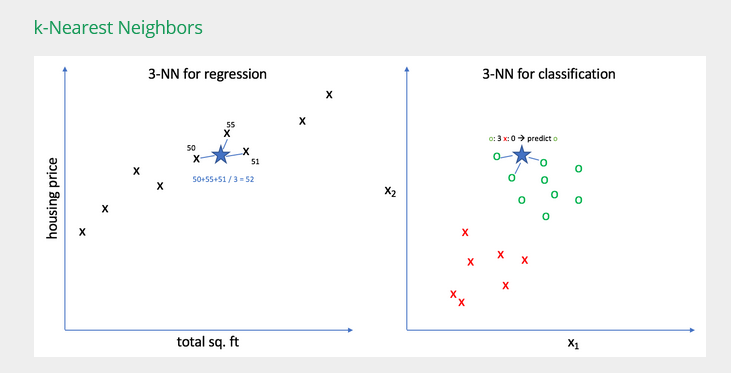


Ties can happen in two situations:

1. k is an even number.


2. There are more than 2 classes.


Tiebreaker rule depends on the knn implementation. In the particular case of **scikit-learn, the tie is solved assigning the class with the lowest label**.

## Load Data

We will be using iris dataset. Yes, AGAIN 😛.

In [1]:
from sklearn.datasets import load_iris;

In [2]:
iris = load_iris();
X = iris.data;
y = iris.target;

## Train/Val/Test Split

Remember:
    
- **Train:** Data used to train the model. This the only data from which the model "see" the target or real value as it uses it to detect patterns and learn to predict it.


- **Validation:** Used in the grid search to decide the optimal set of hyperparameters while fine-tuning the model. This decision is made based on the prediction error over this validation set.


- **Test:** Data used to get the expected error when the model is put into production and start receiving new data. Simulates future data.

Let's define the split ratios for train, validation and test.

There is no *golden rule*, i.e. the optimal ratios are problem dependant, although common recommendation is:

• **Train:** 70%.

• **Validation:** 15%.

• **Test:** 15%.

In [ ]:
perc_values = [0.7, 0.15, 0.15];

We will apply here a random split using train_test_split method.

In [ ]:
from sklearn.model_selection import train_test_split
?train_test_split

First we divide the data into train and a second division we will call valtest.

In [ ]:
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y,
                                         test_size=perc_values[1] + perc_values[2],
                                        random_state=1);

Now we divide valtest into validation and test.

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_valtest,
                                                y_valtest,
                                                test_size= perc_values[2] / (perc_values[1] + perc_values[2]),
                                                random_state=1)

Let's check the dimensions.

In [ ]:
print('Train data size = ' + str(X_train.shape))
print('Train target size = ' + str(y_train.shape))
print('Validation data size = ' + str(X_val.shape))
print('Validation target size = ' + str(y_val.shape))
print('Test data size = ' + str(X_test.shape))
print('Test target size = ' + str(y_test.shape))

Train data size = (105, 4)
Train target size = (105,)
Validation data size = (22, 4)
Validation target size = (22,)
Test data size = (23, 4)
Test target size = (23,)


Lets check target of each subset

In [ ]:
unique_train, counts_train = np.unique(y_train, return_counts=True);
unique_val, counts_val = np.unique(y_val, return_counts=True);
unique_test, counts_test = np.unique(y_test, return_counts=True);
print(np.asarray((unique_train, 100*counts_train / len(y_train))).T);
print(np.asarray((unique_val, 100*counts_val/ len(y_val))).T);
print(np.asarray((unique_test, 100*counts_test/ len(y_test))).T);

[[ 0.         34.28571429]
 [ 1.         30.47619048]
 [ 2.         35.23809524]]
[[ 0.         40.90909091]
 [ 1.         36.36363636]
 [ 2.         22.72727273]]
[[ 0.         21.73913043]
 [ 1.         43.47826087]
 [ 2.         34.7826087 ]]


If we want our classes to be equally distributed we should use the *stratify* argument of train_test_split

In [ ]:
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y,
                                                          stratify = y,
                                                          test_size=perc_values[1] + perc_values[2],
                                                          random_state=1);
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, stratify = y_valtest, test_size= perc_values[2] / (perc_values[1] + perc_values[2]), random_state=1)

In [ ]:
unique_train, counts_train = np.unique(y_train, return_counts=True);
unique_val, counts_val = np.unique(y_val, return_counts=True);
unique_test, counts_test = np.unique(y_test, return_counts=True);
print(np.asarray((unique_train, 100*counts_train / len(y_train))).T);
print(np.asarray((unique_val, 100*counts_val/ len(y_val))).T);
print(np.asarray((unique_test, 100*counts_test/ len(y_test))).T);

[[ 0.         33.33333333]
 [ 1.         33.33333333]
 [ 2.         33.33333333]]
[[ 0.         36.36363636]
 [ 1.         31.81818182]
 [ 2.         31.81818182]]
[[ 0.         30.43478261]
 [ 1.         34.7826087 ]
 [ 2.         34.7826087 ]]


## Single Model

### Imports (Steps 1 & 2)

In [ ]:
# 1) Import model
from sklearn.neighbors import KNeighborsClassifier as model_constructor

In [ ]:
# 2) Import metric
from sklearn.metrics import accuracy_score as metric

### Train (Steps 3-5)

In [ ]:
# [3] Define model
model = model_constructor(n_neighbors = 3)

# [4] Train model
model.fit(X_train, y_train) ## Only train!!! Requires target y for being supervised learning.

# [5] Predict
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)
pred_test = model.predict(X_test)

By default it gives as prediction the predicted label.

In [ ]:
print(pred_test[0:10])

[1 1 1 2 1 2 1 0 2 1]


Often (like when computing the AUC) we will want probabilities.

In [ ]:
# [5] Predict
pred_train_prob = model.predict_proba(X_train)
pred_val_prob = model.predict_proba(X_val)
pred_test_prob = model.predict_proba(X_test)

In [ ]:
print(pred_test_prob[0:10])

[[0.         0.66666667 0.33333333]
 [0.         1.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [0.         1.         0.        ]]


### Model Evaluation (Step 6)

In [ ]:
# [6] Compute metric
metric_train = metric(y_train, pred_train)
metric_val = metric(y_val, pred_val)
metric_test = metric(y_test, pred_test)

In [ ]:
print('Accuracy train = %.2f - Accuracy validation = %.2f - Accuracy test = %.2f '
      % (metric_train, metric_val, metric_test))

Accuracy train = 0.95 - Accuracy validation = 0.95 - Accuracy test = 1.00 


## Validation Curves

Now we are going to build some graphs that allow us to analyze the validation error for a whole series of values ​​of the hyperparameter k. For this we will use the **cross-validation** method over the vombination of train and validation sets.

In [ ]:
from sklearn.model_selection import validation_curve
?validation_curve

In [ ]:
from sklearn.metrics import make_scorer
?make_scorer

In [ ]:
k_values = np.arange(1, 21);
train_scores, val_scores = validation_curve(estimator = model_constructor(),
                                            X = np.concatenate((X_train, X_val), axis = 0),
                                            y = np.concatenate((y_train, y_val), axis = 0),
                                            param_name = 'n_neighbors',
                                            param_range = k_values,
                                            scoring = make_scorer(metric))

Let's plot results

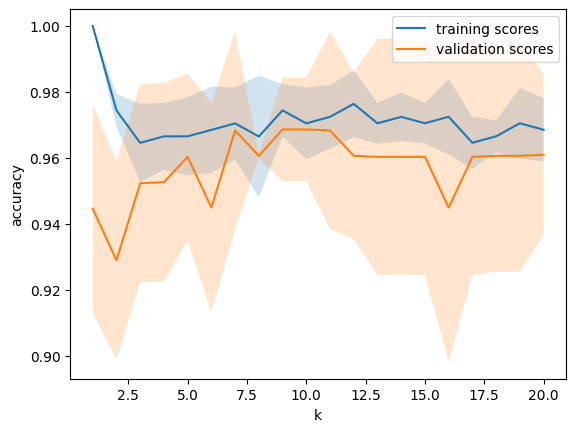

In [ ]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)

plot_with_err(k_values, train_scores, label='training scores')
plot_with_err(k_values, val_scores, label='validation scores')
plt.xlabel('k'); plt.ylabel('accuracy')
plt.legend();

In view of the results, it seems that the optimal value would be 3. However, this way of choosing the hyperparameters, based on a visual approach, does not seem too scientific or scalable to a case where there are several hyperparameters to optimize.

## Grid Search

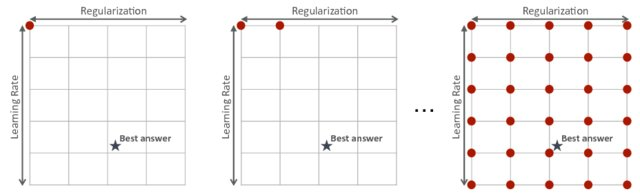

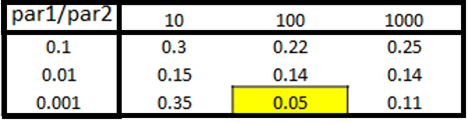

Let's define the grid we will be using.

In [ ]:
params_grid = {'n_neighbors': np.arange(1, 21)}

### Using a Fixed Validation Set

We will use timeit to measure the computational time for each grid search iteration

In [ ]:
from timeit import default_timer
?default_timer

In [ ]:
num_iter = 1;
grid_results = pd.DataFrame(columns = ('k', 'acc_train', 'acc_val', 'time'))
for k in params_grid['n_neighbors']:

            # Start time
            start_time = default_timer()

            # Print trace
            print('Iteracion = ' + str(num_iter) + '. Parametro k = ' + str(k))

            # [3] Define model
            model = model_constructor(n_neighbors = k)

            # [4] Train model
            model.fit(X_train, y_train)

            # [5] Predict
            pred_train = model.predict(X_train)
            pred_val = model.predict(X_val)

            # [6] Compute metric
            metric_train = metric(y_train, pred_train)
            metric_val = metric(y_val, pred_val)

            # Computational time
            time = default_timer() - start_time

            # print error
            print('Accuracy train = %.2f - Accuracy validation = %.2f. Time spend = %.2f.'
                  % (metric_train, metric_val, time))

            # Save iteration results
            grid_results.loc[num_iter]=[k,
                                     metric_train,
                                     metric_val,
                                    time]
            num_iter += 1

print('Grid Search Total Computational Time: ', np.sum(grid_results.time.values))

Iteracion = 1. Parametro k = 1
Accuracy train = 1.00 - Accuracy validation = 0.95. Time spend = 0.01.
Iteracion = 2. Parametro k = 2
Accuracy train = 0.97 - Accuracy validation = 0.95. Time spend = 0.01.
Iteracion = 3. Parametro k = 3
Accuracy train = 0.95 - Accuracy validation = 0.95. Time spend = 0.00.
Iteracion = 4. Parametro k = 4
Accuracy train = 0.96 - Accuracy validation = 0.95. Time spend = 0.00.
Iteracion = 5. Parametro k = 5
Accuracy train = 0.95 - Accuracy validation = 0.95. Time spend = 0.00.
Iteracion = 6. Parametro k = 6
Accuracy train = 0.97 - Accuracy validation = 0.95. Time spend = 0.00.
Iteracion = 7. Parametro k = 7
Accuracy train = 0.96 - Accuracy validation = 1.00. Time spend = 0.00.
Iteracion = 8. Parametro k = 8
Accuracy train = 0.97 - Accuracy validation = 1.00. Time spend = 0.01.
Iteracion = 9. Parametro k = 9
Accuracy train = 0.97 - Accuracy validation = 1.00. Time spend = 0.01.
Iteracion = 10. Parametro k = 10
Accuracy train = 0.97 - Accuracy validation = 1.0

Check results

In [ ]:
grid_results

,k,acc_train,acc_val,time
1,1.0,1.000000,1.000000,0.007439
2,2.0,0.971429,1.000000,0.011333
3,3.0,0.961905,1.000000,0.007548
4,4.0,0.961905,1.000000,0.007602
5,5.0,0.980952,1.000000,0.007262
6,6.0,0.961905,1.000000,0.007988
7,7.0,0.952381,1.000000,0.007698
8,8.0,0.952381,1.000000,0.007363
9,9.0,0.952381,1.000000,0.007561
10,10.0,0.952381,1.000000,0.010022


**Which one is the winner?**

In [ ]:
grid_results = grid_results.sort_values(by = ['acc_val', 'acc_train', 'time'], ascending = [False, False, True])
grid_results

,k,acc_train,acc_val,time
1,1.0,1.000000,1.000000,0.007439
5,5.0,0.980952,1.000000,0.007262
15,15.0,0.980952,1.000000,0.008385
2,2.0,0.971429,1.000000,0.011333
3,3.0,0.961905,1.000000,0.007548
4,4.0,0.961905,1.000000,0.007602
13,13.0,0.961905,1.000000,0.007649
6,6.0,0.961905,1.000000,0.007988
8,8.0,0.952381,1.000000,0.007363
9,9.0,0.952381,1.000000,0.007561


In [ ]:
best_model = grid_results.iloc[0]
best_model

k            1.000000
acc_train    1.000000
acc_val      1.000000
time         0.007439
Name: 1, dtype: float64

### Using Cross-Validation

In [ ]:
from sklearn.model_selection import GridSearchCV
?GridSearchCV

In [ ]:
# Define grid
grid_cv = GridSearchCV(model_constructor(),
                     param_grid=params_grid,
                     n_jobs=2, ## Paralellization!
                     cv = 5) # Number of folds

In this case, we do not need a fixed validation set, so we will combine train validation.

In [ ]:
# Run grid
start_time = default_timer()

grid_cv.fit(np.concatenate((X_train, X_val), axis = 0),
            np.concatenate((y_train, y_val), axis = 0))

stop_time = default_timer()
print('CV Grid Search Total Computational Time: : ', stop_time - start_time)

CV Grid Search Total Computational Time: :  2.8591441340000756


In [ ]:
print('Values validated for k hyperparameter: ' + str(grid_cv.cv_results_['param_n_neighbors']))
print('Validation accuracy: ' + str(grid_cv.cv_results_['mean_test_score']))
print('Best score ' + str(grid_cv.best_score_))
print('Best params: ' + str(grid_cv.best_params_))

Values validated for k hyperparameter: [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20]
Validation accuracy: [0.96030769 0.94492308 0.96830769 0.96830769 0.96030769 0.96061538
 0.95261538 0.95261538 0.95261538 0.96092308 0.96061538 0.96061538
 0.97630769 0.95261538 0.96061538 0.94461538 0.95230769 0.93661538
 0.94461538 0.93661538]
Best score 0.9763076923076923
Best params: {'n_neighbors': 13}


In [ ]:
print('Best k using fixed validation set = ' + str(best_model.k))
print('Best k using CV = ' + str(grid_cv.best_params_['n_neighbors']))

Best k using fixed validation set = 1.0
Best k using CV = 13


## Final Model

Validation has served its purpose, let's combine it with train to get more training data.

In [ ]:
print('Old train data size = ' + str(X_train.shape))
print('Old train target size = ' + str(y_train.shape))

# Combine train and validación
X_train = np.concatenate((X_train, X_val), axis = 0)
y_train = np.concatenate((y_train, y_val), axis = 0)

print('New train data size = ' + str(X_train.shape))
print('New train target size = ' + str(y_train.shape))

Old train data size = (105, 4)
Old train target size = (105,)
New train data size = (127, 4)
New train target size = (127,)


Let's use in this case the best hyperparameters from fixed validation set grid search.

In [ ]:
# [3] Define model
model = model_constructor(n_neighbors = int(best_model.k)) # We could also select grid_cv.best_params_['n_neighbors']

# [4] Train model
model.fit(X_train, y_train)

# [5] Predict
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# [6] Compute metric
metric_train = metric(y_train, pred_train)
metric_test = metric(y_test, pred_test)



In [ ]:
# print error
print('Accuracy train = %.2f - Accuracy test = %.2f'
      % (metric_train, metric_test))

Accuracy train = 0.98 - Accuracy test = 0.96
